#**EDA on the dataset of Top Rated 9630 Movies on TMDB**#

#**Step 1: Loading the Dataset**#
First, load the dataset and check its structure.
And import required libraries.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
file_path = '/content/top_rated_9000_movies_on_TMDB.csv'  # Change this to your actual path
df = pd.read_csv(file_path)

# Basic overview of the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9630 non-null   int64  
 1   title              9630 non-null   object 
 2   original_language  9630 non-null   object 
 3   release_date       9630 non-null   object 
 4   vote_average       9630 non-null   float64
 5   vote_count         9630 non-null   int64  
 6   popularity         9630 non-null   float64
 7   overview           9630 non-null   object 
 8   genre_ids          9630 non-null   object 
 9   Genres             9630 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 752.5+ KB
None
    id                     title original_language release_date  vote_average  \
0  278  The Shawshank Redemption                en   1994-09-23         8.706   
1  238             The Godfather                en   1972-03-14         8.690   
2  24

#**Step 2: Handling Missing Values**#

Check for missing values and handle them by either dropping or filling them as needed.



In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Option 1: Drop rows with missing values (if missing values are rare)
# df_cleaned = df.dropna()

# Option 2: Fill missing values (for example, filling missing genres with 'Unknown')
# df['Genres'] = df['Genres'].fillna('Unknown')


id                   0
title                0
original_language    0
release_date         0
vote_average         0
vote_count           0
popularity           0
overview             0
genre_ids            0
Genres               0
dtype: int64


#**Step 3: Statistical Summary**#
Get a statistical summary of the numeric columns to understand the distribution of important features like vote_average, vote_count, and popularity.

In [3]:
# Summary statistics of numerical columns
print(df.describe())


                 id  vote_average    vote_count   popularity
count  9.630000e+03   9630.000000   9630.000000  9630.000000
mean   1.944046e+05      6.633820   1976.992004    25.522728
std    2.576246e+05      0.783581   3124.089193    58.278888
min    2.000000e+00      2.200000    300.000000     0.018000
25%    1.013825e+04      6.106000    468.000000    10.780250
50%    3.748350e+04      6.659000    843.000000    15.620000
75%    3.524915e+05      7.200000   1964.750000    25.325000
max    1.226578e+06      8.706000  36306.000000  2811.772000


#**Step 4: Visualizing Key Features**#
Now let's visualize some key features of the dataset. We can use libraries like Matplotlib and Seaborn for this purpose.



##**4.1 Distribution of Movie Ratings**##
Understanding how movie ratings are distributed can help identify trends like whether movies tend to receive high or low scores.



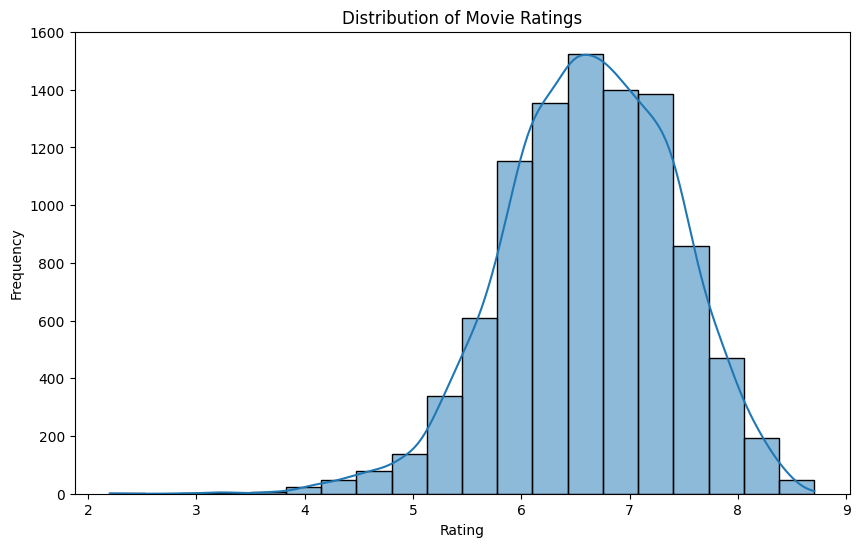

In [4]:
# Plot the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


##**4.2 Popularity vs. Rating**##
Check if there's a relationship between a movie’s popularity and its rating.



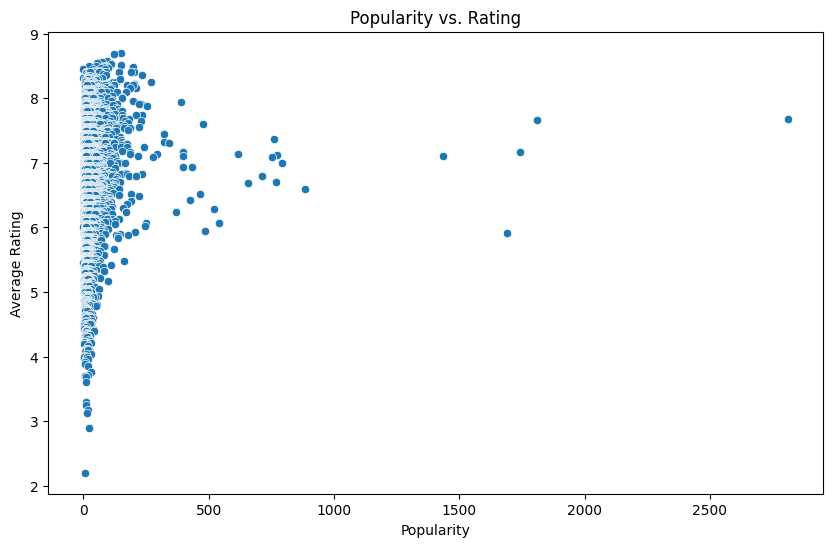

In [5]:
# Scatter plot of popularity vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.show()


***Key Observations You Might Find:***

No Clear Relationship: You might notice that popularity and rating don't have a direct relationship. Some highly popular movies could have average or even low ratings, while some lesser-known movies may have high ratings.

Outliers: The plot may highlight movies that are extremely popular but have surprisingly low ratings, or movies with high ratings but low popularity.

Clusters: You may see clusters where most movies lie within a particular range of popularity and rating, giving an idea of common trends.

##**4.3 Number of Movies Released Over Time**##
We can analyze the number of movies released over the years to see if movie production has increased or decreased.



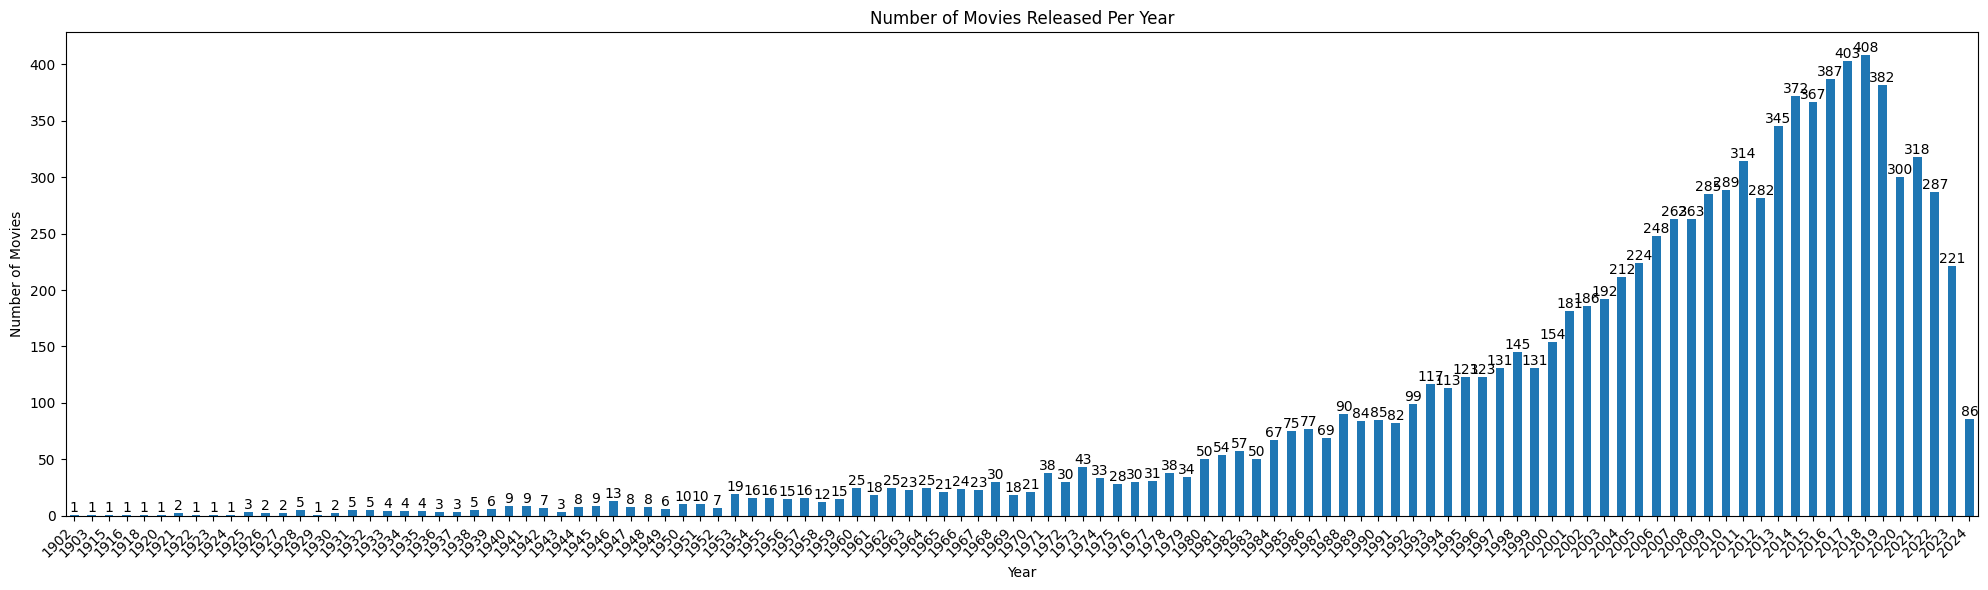

In [14]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Count movies by year of release
movies_per_year = df['release_year'].value_counts().sort_index()

# Plot the number of movies released per year with rotated x-axis labels and value annotations
plt.figure(figsize=(20, 6))
ax = movies_per_year.plot(kind='bar')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set plot title and labels
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Show plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


##**4.4 Top 10 Movies by Rating**##
Find and display the top 10 movies with the highest ratings.



In [15]:
# Get the top 10 movies by rating
top_rated_movies = df[['title', 'vote_average']].nlargest(10, 'vote_average')

# Display the top 10 movies
print(top_rated_movies)


                         title  vote_average
0     The Shawshank Redemption         8.706
1                The Godfather         8.690
2        The Godfather Part II         8.575
3             Schindler's List         8.565
4                 12 Angry Men         8.546
5                Spirited Away         8.537
7              The Dark Knight         8.516
8                     Parasite         8.507
9               The Green Mile         8.507
6  Dilwale Dulhania Le Jayenge         8.500


#**Step 5: Analyzing Genres**#
Analyze how genres affect ratings. Since the Genres column has multiple genres per movie, we will need to split them and analyze the ratings by genre.



##**5.1 Frequency of Each Genre**##
Find out which genres are the most common.

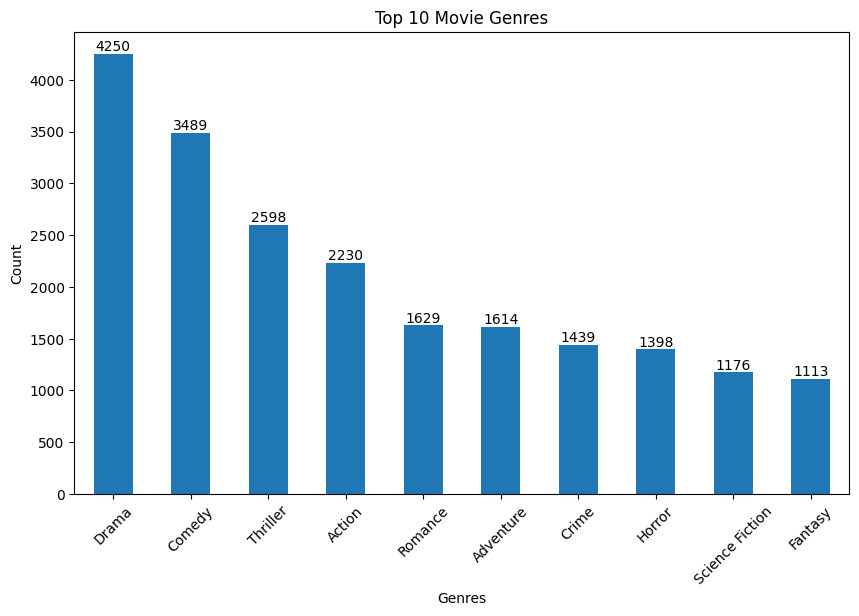

In [18]:
# Split the genres column
df['Genres'] = df['Genres'].str.replace('[', '').str.replace(']', '').str.replace("'", "")
genres_split = df['Genres'].str.get_dummies(sep=', ')

# Count the frequency of each genre
genre_counts = genres_split.sum().sort_values(ascending=False)

# Display the frequency of each genre
# print(genre_counts)

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
ax = genre_counts.head(10).plot(kind='bar')
# Add labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Explanation**

```
df['Genres'] = df['Genres'].str.replace('[', '').str.replace(']', '').str.replace("'", "")

```

What it does:

The Genres column contains values like ['Action', 'Adventure'], which have brackets ([]) and single quotes (') as part of the string.
This code uses the str.replace() function to remove unwanted characters:
str.replace('[', '') removes the left bracket [.
str.replace(']', '') removes the right bracket ].
str.replace("'", "") removes single quotes '.
Result: After this operation, the Genres column will look like a clean string separated by commas:

Original: ['Action', 'Adventure']

After cleaning: Action, Adventure

```
genres_split = df['Genres'].str.get_dummies(sep=', ')

```
What it does:

This line splits the Genres string by the separator , (comma followed by space).
The str.get_dummies() function splits the string into individual genres and creates dummy/indicator variables for each genre.
A dummy variable is a binary (0 or 1) representation that indicates whether a particular genre is present for that movie.

Example: If a movie has the genres Action, Adventure, the resulting genres_split will look something like this:


Movie Title	Action	Adventure	Drama	Comedy
Movie       1	      1	        0	    0
Movie      	0	      0	        1	    1


Each column represents a genre, and a 1 in the column indicates that the movie belongs to that genre.



##**5.2 Ratings by Genre**##
Analyze how average ratings differ by genre.


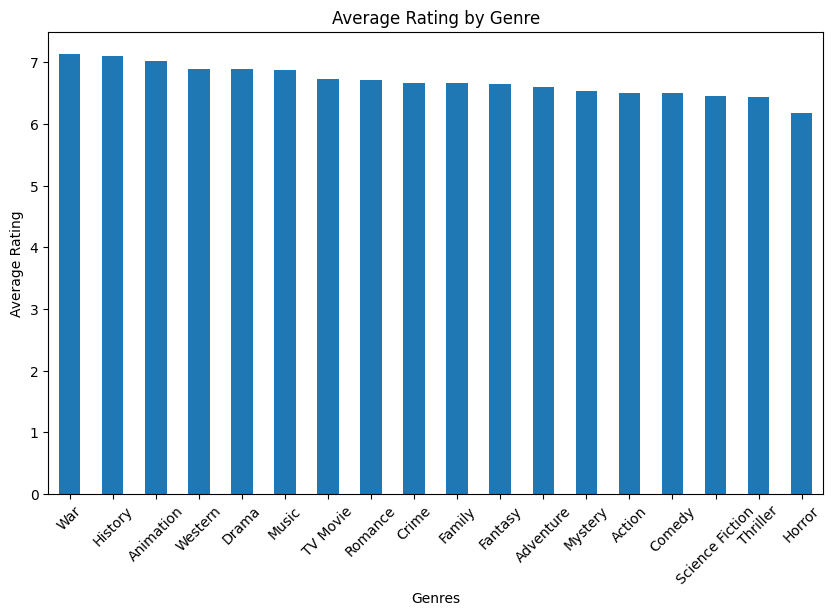

In [19]:
# Calculate the mean rating for each genre
average_rating_by_genre = genres_split.T.dot(df['vote_average']) / genres_split.sum() #Explore how does it work?

# Plot the average rating by genre
plt.figure(figsize=(10, 6))
average_rating_by_genre.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


#**Step 6: Language Analysis**#
Examine the distribution of movies by their original language to understand which languages dominate the top-rated movies.


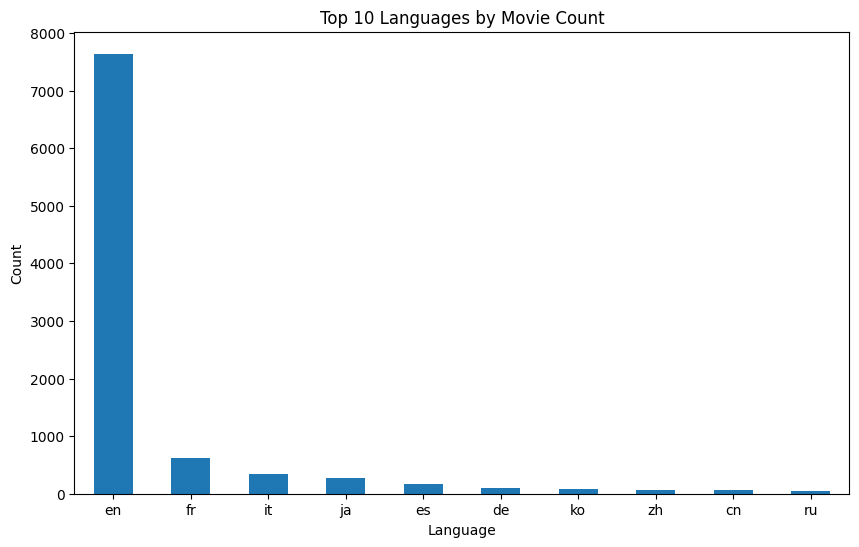

In [24]:
# Count the number of movies by original language
language_counts = df['original_language'].value_counts()

# Plot the top 10 languages
plt.figure(figsize=(10, 6))
language_counts.head(10).plot(kind='bar')
plt.title('Top 10 Languages by Movie Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#**Step 7: Advanced Analysis (Optional)**#
You can explore more advanced analyses like:

1. Correlation matrix to see how features are related.
2. Comparing revenue and budget (if available) to movie ratings.

**Correlation Matrix: **

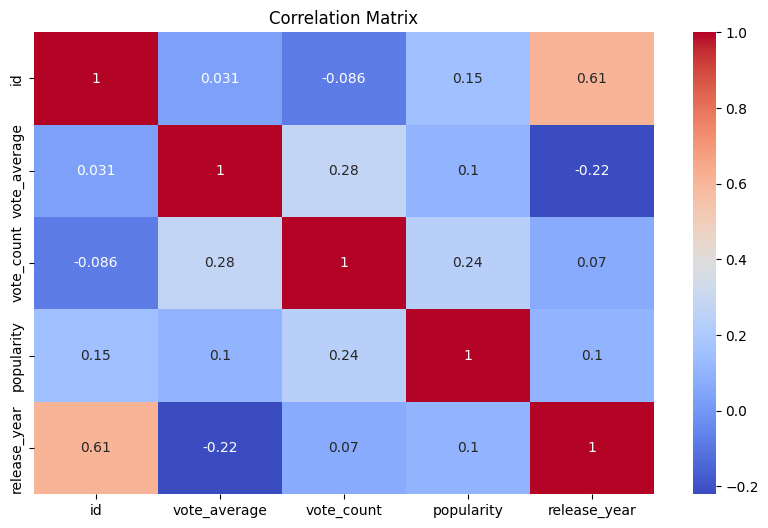

In [26]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numerical columns using select_dtypes
plt.title('Correlation Matrix')
plt.show()

#**Conclusion**#
By following these steps, you'll be able to gain a deeper understanding of the "TMDB Top Rated 9000 Movies" dataset.
You can try out more operation to get much useful informations from this datset. Or use it for training a ML model or doing other stuffs.